**Importing Libraries**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

### **Task-1:** Download ten 8-bit grayscale images of size 500x500.

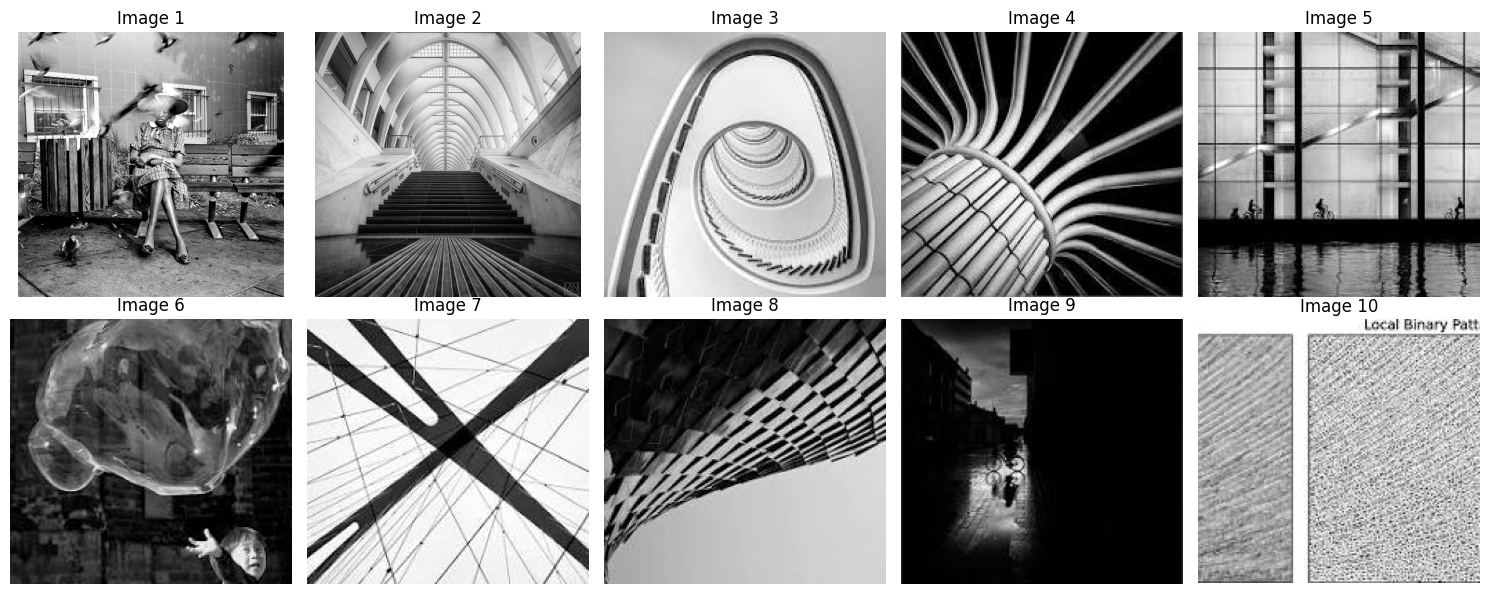

In [2]:
import cv2
import matplotlib.pyplot as plt

# List of image paths
image_paths = ['image-1.jpg', 'image-2.jpg', 'image-3.jpeg', 'image-4.jpeg', 'image-5.jpeg', 
               'image-6.jpeg', 'image-7.jpeg', 'image-8.jpeg', 'image-9.jpeg', 'image-10.jpeg']

# Create a dictionary to store the images for future use
images_dict = {}

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust the size as needed
axes = axes.ravel()  # Flatten the 2x5 grid into a 1D array for easier iteration

# Loop through the images and plot them
for i, image_path in enumerate(image_paths):
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Save each image in the dictionary with the key as 'image_i'
    images_dict[f'image_{i+1}'] = gray_image
    
    # Plot the image
    axes[i].imshow(gray_image, cmap='gray')
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f'Image {i+1}') 

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **Task-2:** Implement the lossless predictive coding using: 

**(a) simplest predictor (fx+1 = fx)**

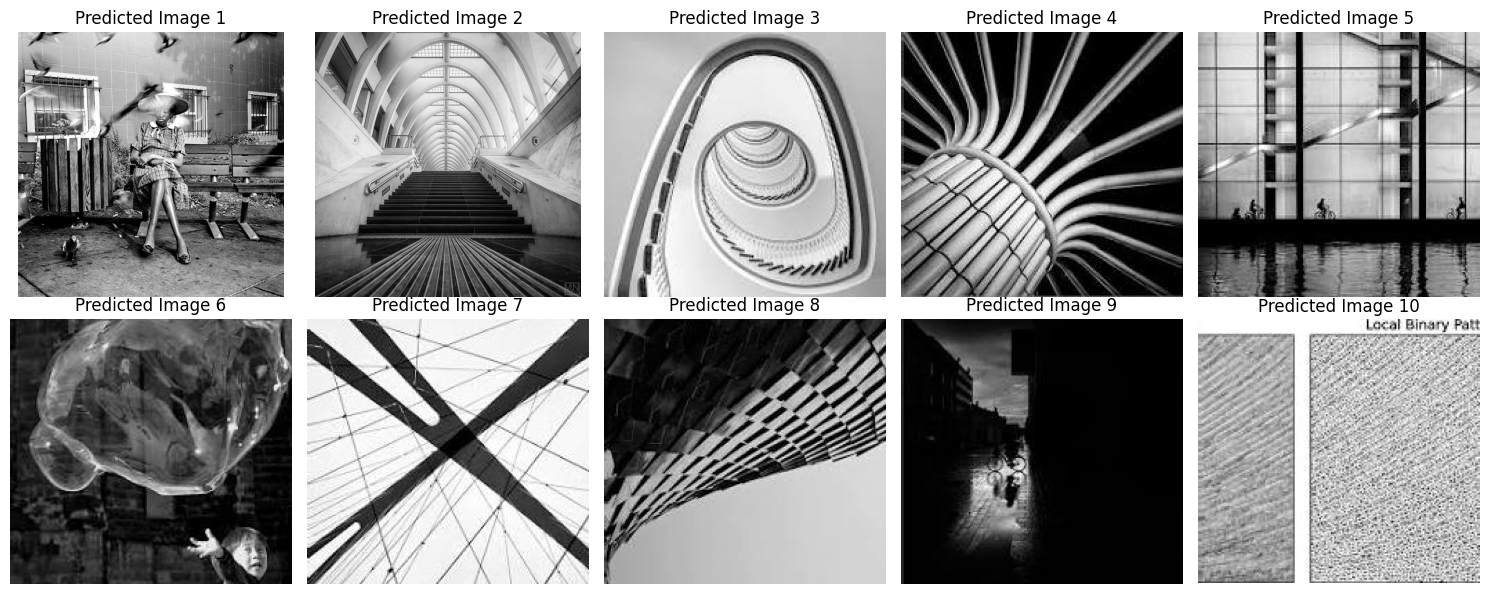

In [3]:
def simplest_predictor(gray_image):    
# Create a predicted image where each pixel is the same as the previous one
    predicted_image = np.copy(gray_image)
    predicted_image[:, 1:] = gray_image[:, :-1]
    return predicted_image

# Create a dictionary to store the predicted images for future use
predicted_images_dict = {}

# Create a figure with subplots for the predicted images (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust the size as needed
axes = axes.ravel()  # Flatten the 2x5 grid into a 1D array for easier iteration

# Loop through the images, apply the simplest predictor, and plot them
for i, image_path in enumerate(image_paths):
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply the simplest predictor
    predicted_image = simplest_predictor(gray_image)
    
    # Save each predicted image in the dictionary with the key as 'predicted_image_i'
    predicted_images_dict[f'predicted_image_{i+1}'] = predicted_image
    
    # Plot the predicted image
    axes[i].imshow(predicted_image, cmap='gray')
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f'Predicted Image {i+1}')  # Set title as Predicted Image 1, Predicted Image 2, ...

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**(b) median of 3 pixels**

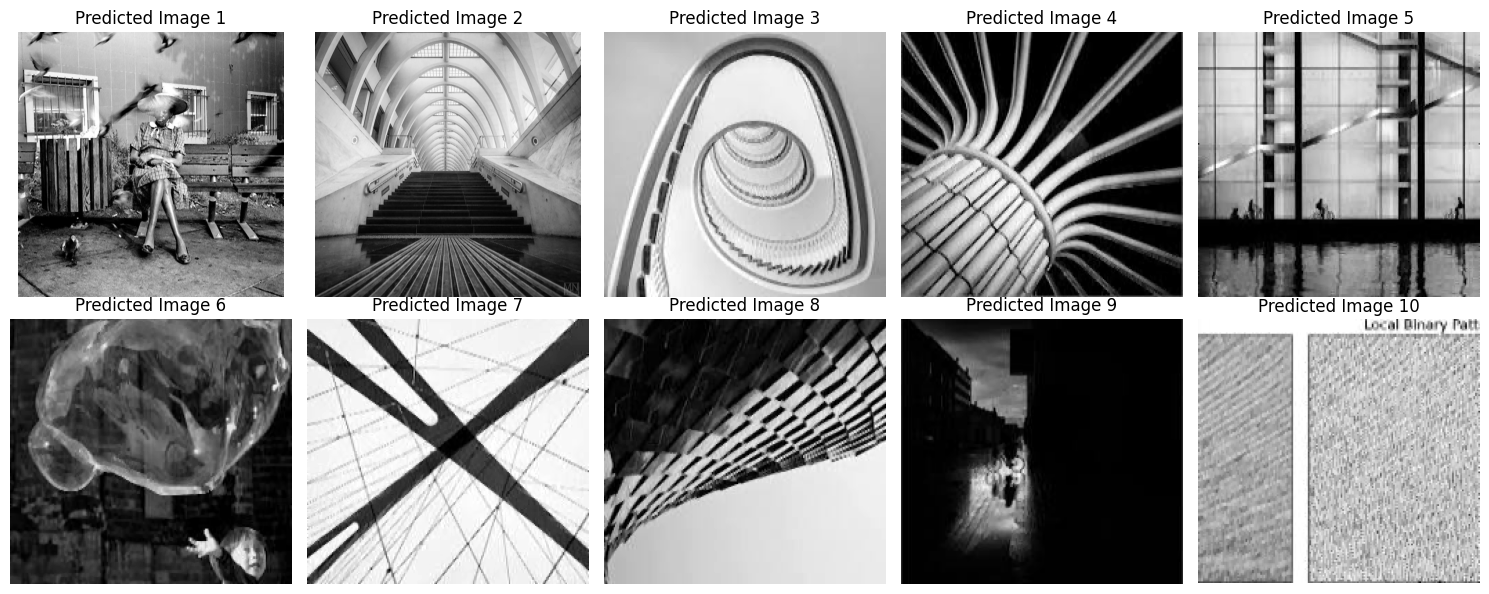

In [4]:
def median_predictor(gray_image):    
# Create an image for the predicted values using the median of 3 pixels
    predicted_image = np.copy(gray_image)

    # Loop through each pixel (excluding the border pixels to avoid out of range issues)
    for i in range(1, gray_image.shape[0] - 1):
        for j in range(1, gray_image.shape[1] - 1):
            # Extract the 3x3 neighborhood
            neighborhood = [gray_image[i-1, j], gray_image[i, j], gray_image[i+1, j]]
            # Compute the median of the 3 neighboring pixels
            predicted_image[i, j] = np.median(neighborhood)

    return predicted_image

# Create a dictionary to store the predicted images for future use
predicted_images_median = {}

# Create a figure with subplots for the predicted images (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust the size as needed
axes = axes.ravel()  # Flatten the 2x5 grid into a 1D array for easier iteration

# Loop through the images, apply the simplest predictor, and plot them
for i, image_path in enumerate(image_paths):
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply the simplest predictor
    predicted_image = median_predictor(gray_image)
    
    # Save each predicted image in the dictionary with the key as 'predicted_image_i'
    predicted_images_median[f'predicted_image_{i+1}'] = predicted_image
    
    # Plot the predicted image
    axes[i].imshow(predicted_image, cmap='gray')
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f'Predicted Image {i+1}')  # Set title as Predicted Image 1, Predicted Image 2, ...

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**(c) one other predictor of your own choice**

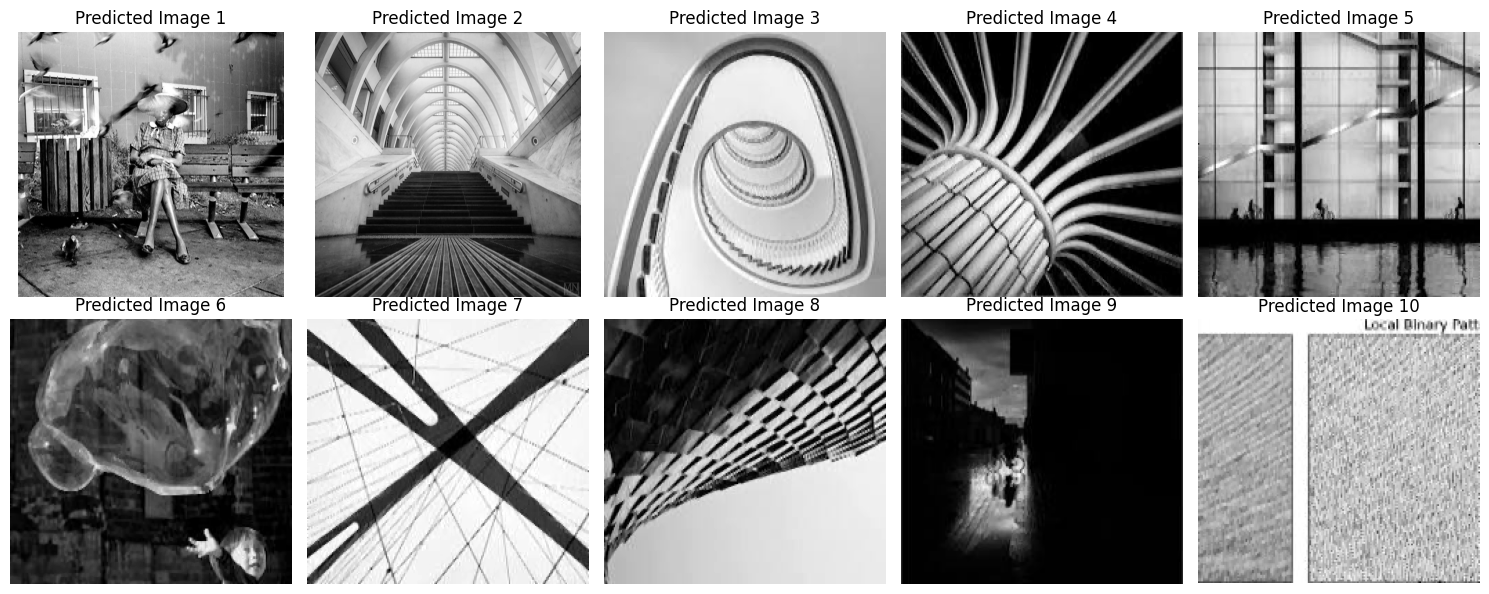

In [12]:
def weighted_predictor(gray_image):
    predicted_image = np.copy(gray_image)

    # Weights for the predictor: closer pixel gets a higher weight
    w_xm1 = 0.7  # Weight for the previous pixel
    w_xp1 = 0.3  # Weight for the next pixel

    # Loop through each pixel (excluding the border pixels to avoid out of range issues)
    for i in range(1, gray_image.shape[0] - 1):
        for j in range(1, gray_image.shape[1] - 1):
            # Weighted average of the left and right neighbors
            predicted_image[i, j] = (w_xm1 * gray_image[i-1, j] + w_xp1 * gray_image[i+1, j]) / (w_xm1 + w_xp1)

    return predicted_image

# Create a dictionary to store the predicted images for future use
predicted_images_weighted = {}

# Create a figure with subplots for the predicted images (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust the size as needed
axes = axes.ravel()  # Flatten the 2x5 grid into a 1D array for easier iteration

# Loop through the images, apply the simplest predictor, and plot them
for i, image_path in enumerate(image_paths):
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply the simplest predictor
    predicted_image = median_predictor(gray_image)
    
    # Save each predicted image in the dictionary with the key as 'predicted_image_i'
    predicted_images_weighted[f'predicted_image_{i+1}'] = predicted_image
    
    # Plot the predicted image
    axes[i].imshow(predicted_image, cmap='gray')
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f'Predicted Image {i+1}')  # Set title as Predicted Image 1, Predicted Image 2, ...

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **Task-3:** Huffman Coding

**a) Simplest Predictive Coding**

In [6]:
def build_huffman_tree(frequency):
    # Create a priority queue (min-heap)
    heap = [[weight, [symbol, ""]] for symbol, weight in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    return sorted(heap[0][1:], key=lambda p: (len(p[-1]), p))

# Function to create a frequency table
def calculate_frequency(image):
    frequency = defaultdict(int)
    for pixel in image.ravel():
        frequency[pixel] += 1
    return frequency

# Function to calculate the compressed size and original size
def calculate_compression_ratio(image, huffman_codes):
    # Calculate original size (in bits)
    original_size = image.size * 8

    # Calculate the compressed size (in bits)
    compressed_size = 0
    for pixel in image.ravel():
        compressed_size += len(huffman_codes[pixel])
    
    # Calculate compression ratio
    compression_ratio = original_size / compressed_size
    return compression_ratio, original_size, compressed_size

# Function to calculate compression ratios for both the original and residual images
def huffman_compression(image, residual, original=True):
    # Step 1: Huffman coding on the original image
    frequency_original = calculate_frequency(image)
    huffman_tree_original = build_huffman_tree(frequency_original)
    huffman_codes_original = {symbol: code for symbol, code in huffman_tree_original}


    if original:
        # Step 2: Calculate compression ratio for the original image
        compression_ratio_original, original_size, compressed_size_original = calculate_compression_ratio(image, huffman_codes_original)
        print("Compression Ratio (Original Image):", compression_ratio_original)

    # Step 3: Huffman coding on the residual image
    frequency_residual = calculate_frequency(residual)
    huffman_tree_residual = build_huffman_tree(frequency_residual)
    huffman_codes_residual = {symbol: code for symbol, code in huffman_tree_residual}

    # Step 4: Calculate compression ratio for the residual image
    compression_ratio_residual, _, compressed_size_residual = calculate_compression_ratio(residual, huffman_codes_residual)
    print("Compression Ratio (Predicted Image):", compression_ratio_residual)
    return 

# Call the function to calculate the compression ratios
huffman_compression(gray_image, predicted_images_dict['predicted_image_1'], original=True)
huffman_compression(gray_image, predicted_images_dict['predicted_image_2'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_3'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_4'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_5'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_6'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_7'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_8'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_9'], original=False)
huffman_compression(gray_image, predicted_images_dict['predicted_image_10'], original=False)

Compression Ratio (Original Image): 1.1196999792775444
Compression Ratio (Predicted Image): 1.0186867904846504
Compression Ratio (Predicted Image): 1.009659411590688
Compression Ratio (Predicted Image): 1.0980117319727796
Compression Ratio (Predicted Image): 1.1939051944538641
Compression Ratio (Predicted Image): 1.0686237731138863
Compression Ratio (Predicted Image): 1.095708001426703
Compression Ratio (Predicted Image): 1.2315577233727288
Compression Ratio (Predicted Image): 1.1185304438153916
Compression Ratio (Predicted Image): 1.9377268763875404
Compression Ratio (Predicted Image): 1.1197339358190925


**b) Median based Predictive Coding**

In [10]:
# Call the function to calculate the compression ratios
huffman_compression(gray_image, predicted_images_median['predicted_image_1'], original=True)
huffman_compression(gray_image, predicted_images_median['predicted_image_2'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_3'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_4'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_5'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_6'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_7'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_8'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_9'], original=False)
huffman_compression(gray_image, predicted_images_median['predicted_image_10'], original=False)

Compression Ratio (Original Image): 1.1196999792775444
Compression Ratio (Predicted Image): 1.0165111912799605
Compression Ratio (Predicted Image): 1.0136266904125613
Compression Ratio (Predicted Image): 1.100970812383392
Compression Ratio (Predicted Image): 1.183524390474212
Compression Ratio (Predicted Image): 1.0691232918777829
Compression Ratio (Predicted Image): 1.0970545089155985
Compression Ratio (Predicted Image): 1.2616981610704205
Compression Ratio (Predicted Image): 1.1128142113375334
Compression Ratio (Predicted Image): 1.9336970205623165
Compression Ratio (Predicted Image): 1.1622719116921818


**c) Weighted Predictive Coding**

In [13]:
# Call the function to calculate the compression ratios
huffman_compression(gray_image, predicted_images_weighted['predicted_image_1'], original=True)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_2'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_3'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_4'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_5'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_6'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_7'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_8'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_9'], original=False)
huffman_compression(gray_image, predicted_images_weighted['predicted_image_10'], original=False)

Compression Ratio (Original Image): 1.1196999792775444
Compression Ratio (Predicted Image): 1.0165111912799605
Compression Ratio (Predicted Image): 1.0136266904125613
Compression Ratio (Predicted Image): 1.100970812383392
Compression Ratio (Predicted Image): 1.183524390474212
Compression Ratio (Predicted Image): 1.0691232918777829
Compression Ratio (Predicted Image): 1.0970545089155985
Compression Ratio (Predicted Image): 1.2616981610704205
Compression Ratio (Predicted Image): 1.1128142113375334
Compression Ratio (Predicted Image): 1.9336970205623165
Compression Ratio (Predicted Image): 1.1622719116921818
